# Customer Segmentation

## Context:

- Customer Personality Analysis is a detailed analysis of a company's ideal customers. It helps a business better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.

- Customer personality analysis helps a business modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company's database, a company can analyze which customer segment is most likely to buy the product and then market the product only to that particular segment.

- Customer segmentation involves categorizing customers into groups based on similarities within each cluster. This process aims to enhance the importance of individual customers for the business. By dividing customers into segments, businesses can tailor products to meet specific needs and behaviors of each group. Additionally, customer segmentation aids in addressing the various concerns of different customer types.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Set default plotting parameters
plt.rcParams['figure.figsize'] = [15, 10]  # Adjust as needed
plt.rcParams.update({'font.size': 12})  # Adjust as needed
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)  # Adjust font scale as needed


In [2]:
# Load the data
file_path = r"C:\Users\kadar\Downloads\Pythonmn\Customer_Analysis\Customers_Analysis.csv"
data = pd.read_csv(file_path)

# Display the first few rows and information about the data structure
print("First few rows of the data:")
print(data.head())
print("\nInformation about the data structure:")
print(data.info())


First few rows of the data:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0    4/9/2012       58       635  ...                  7             0   
1    8/3/2014       38        11  ...                  5             0   
2   9/21/2014       26       426  ...                  4             0   
3   10/2/2014       26        11  ...                  6             0   
4   7/19/2015       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2 

## About Dataset

- The data consists of 29 columns and 2240 entries. Here's a breakdown of the information about the data structure:

-    First few rows of the data:
        The dataset includes various features such as ID, year of birth, education, marital status, income, number of children at home (Kidhome, Teenhome), customer recency, and different spending amounts on products.
        There are also columns indicating the number of deals, web, catalog, and store purchases, as well as the number of web visits per month.
        Additionally, there are binary columns representing whether a customer accepted different marketing campaigns, complained, and other contact cost-related information.

-    Information about the data structure:
        The ID column serves as an identifier for each customer.
        Year_Birth represents the birth year of each customer.
        Education and Marital_Status are categorical variables indicating the education level and marital status of customers, respectively.
        Income is a numerical variable representing the income of customers. However, there are some missing values in this column (2216 non-null out of 2240 entries).
        Kidhome and Teenhome represent the number of children at home categorized into different age groups.
        Dt_Customer is a date column indicating the date when the customer was registered.
        The rest of the columns represent various numerical variables related to customer behavior, spending, and responses to marketing campaigns.

In [3]:
# Summary Statistics
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.

- The "Summary Statistics" section provides descriptive statistics for each column, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum values.

- Here's a brief interpretation of the summary statistics:

    The dataset contains 2240 observations.
    Most variables have no missing values, except for the 'Income' column, which has been imputed.
    The mean income of customers is approximately $52,247, with a standard deviation of $25,037, indicating some variability in income levels.
    The minimum and maximum incomes are $1,730 and $666,666, respectively, with a wide range of income distribution.
    The majority of customers have no children at home (Kidhome and Teenhome).
    Recency, which likely represents the number of days since the last purchase, has a mean value of approximately 49 days, with a standard deviation of 28.96 days.
    Customers have varying levels of spending on different product categories, as indicated by the mean and standard deviation of spending variables (e.g., MntWines, MntFruits, MntMeatProducts).
    Other variables, such as accepted campaigns, complaints, and contact costs, have binary or constant values across observations.

In [4]:
# Handling Missing Values
mean_income = data['Income'].mean()
data['Income'] = data['Income'].fillna(mean_income)  # Corrected line to fill missing values with mean income
print("\nMissing Values after Imputation:")
print(data.isnull().sum())

# Summary Statistics after imputation
print("\nSummary Statistics:")
print(data.describe())



Missing Values after Imputation:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Summary Statistics:
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0

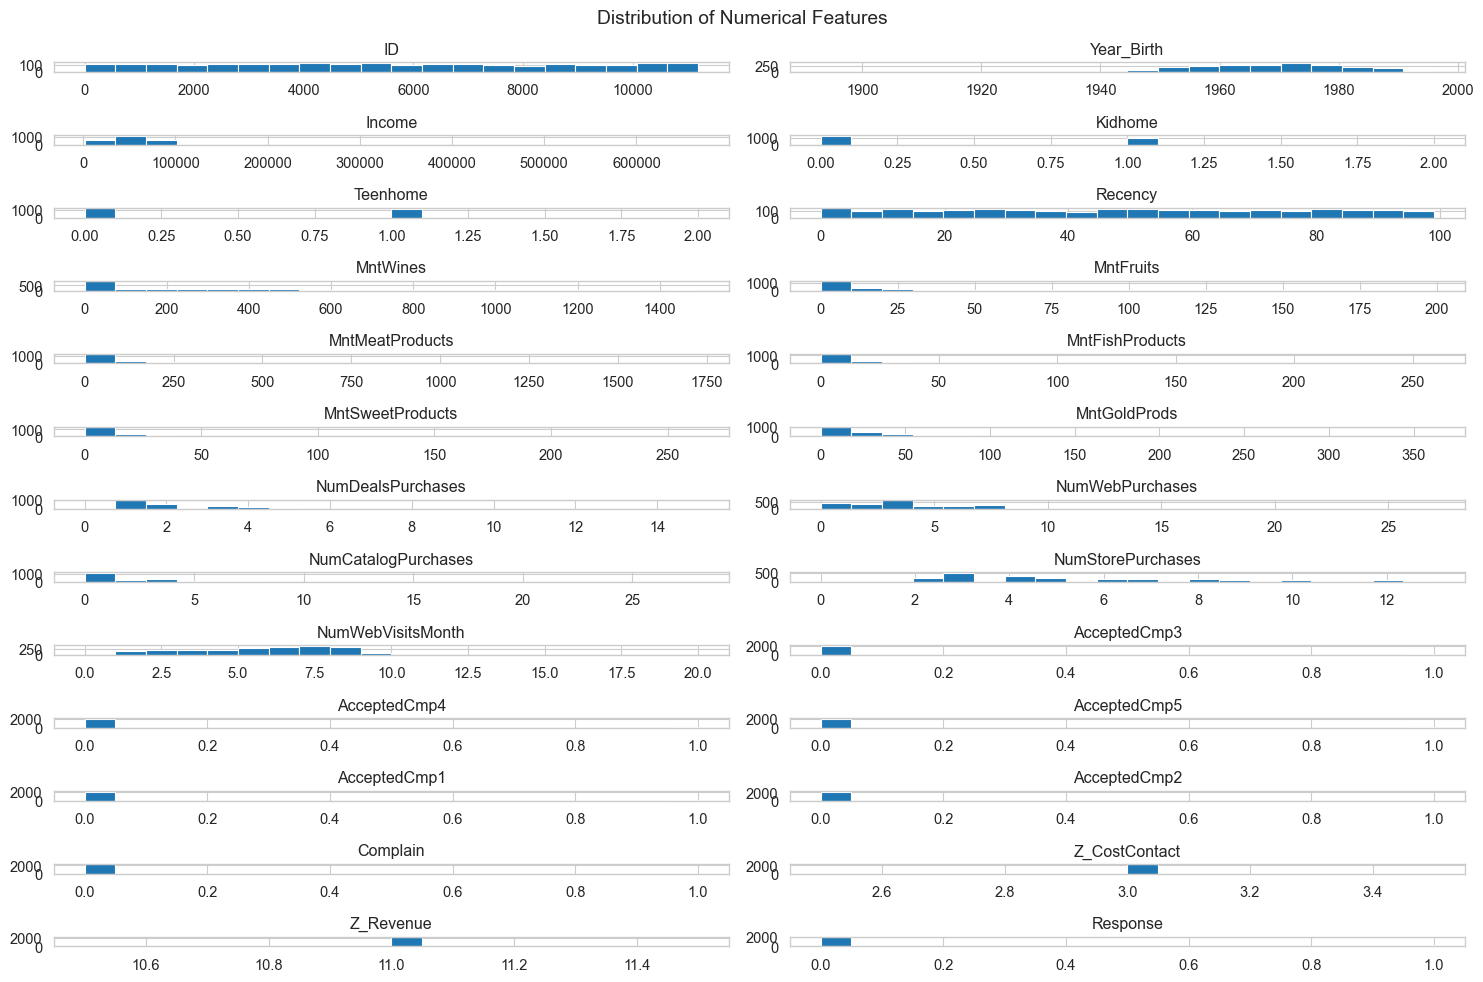

In [5]:
# Distribution of Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
num_plots = len(numerical_features)
fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2)
fig.suptitle('Distribution of Numerical Features')

for i, feature in enumerate(numerical_features):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    data[feature].hist(ax=ax, bins=20)
    ax.set_title(feature)

# Hide empty subplots
for i in range(num_plots, len(axes.flatten())):
    axes.flatten()[i].axis('off')

plt.tight_layout()
plt.show()


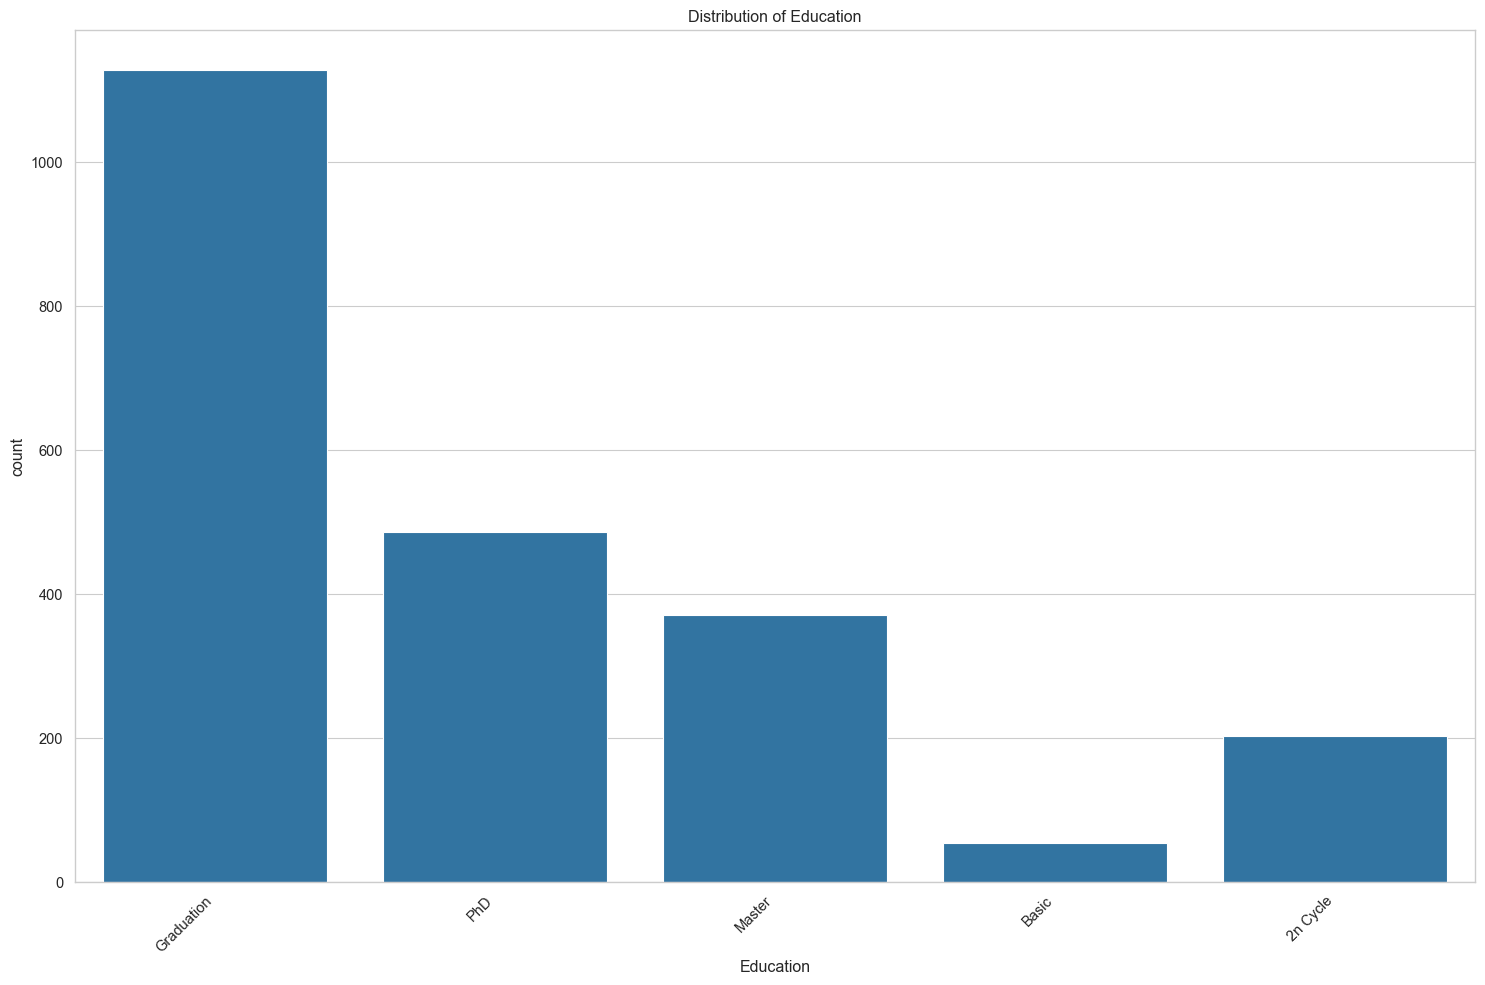

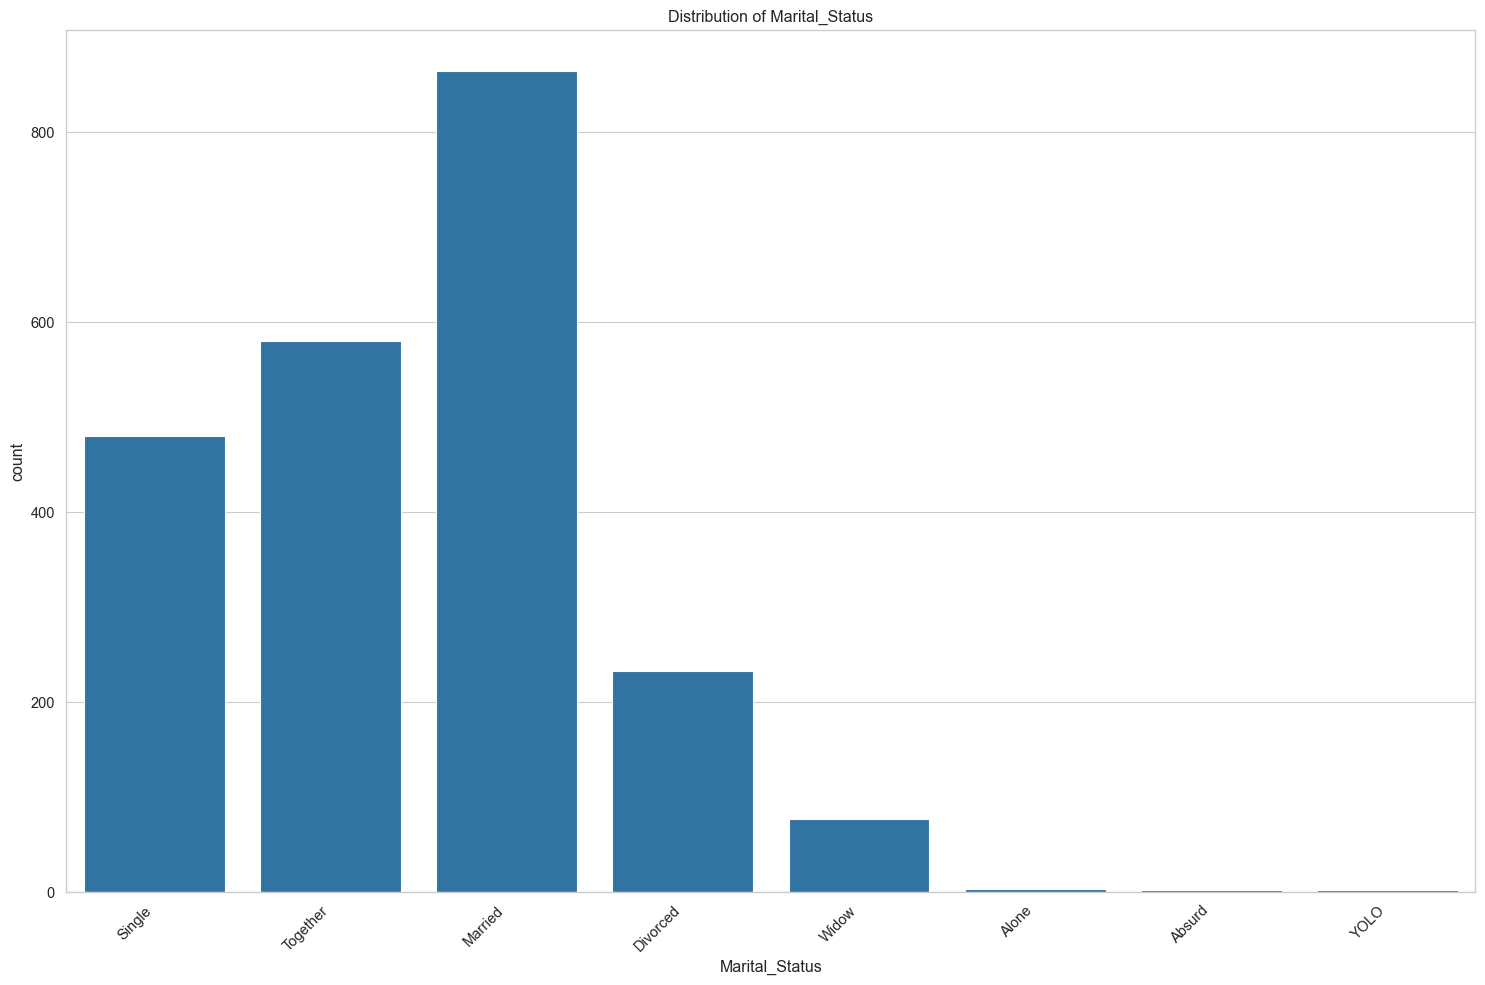

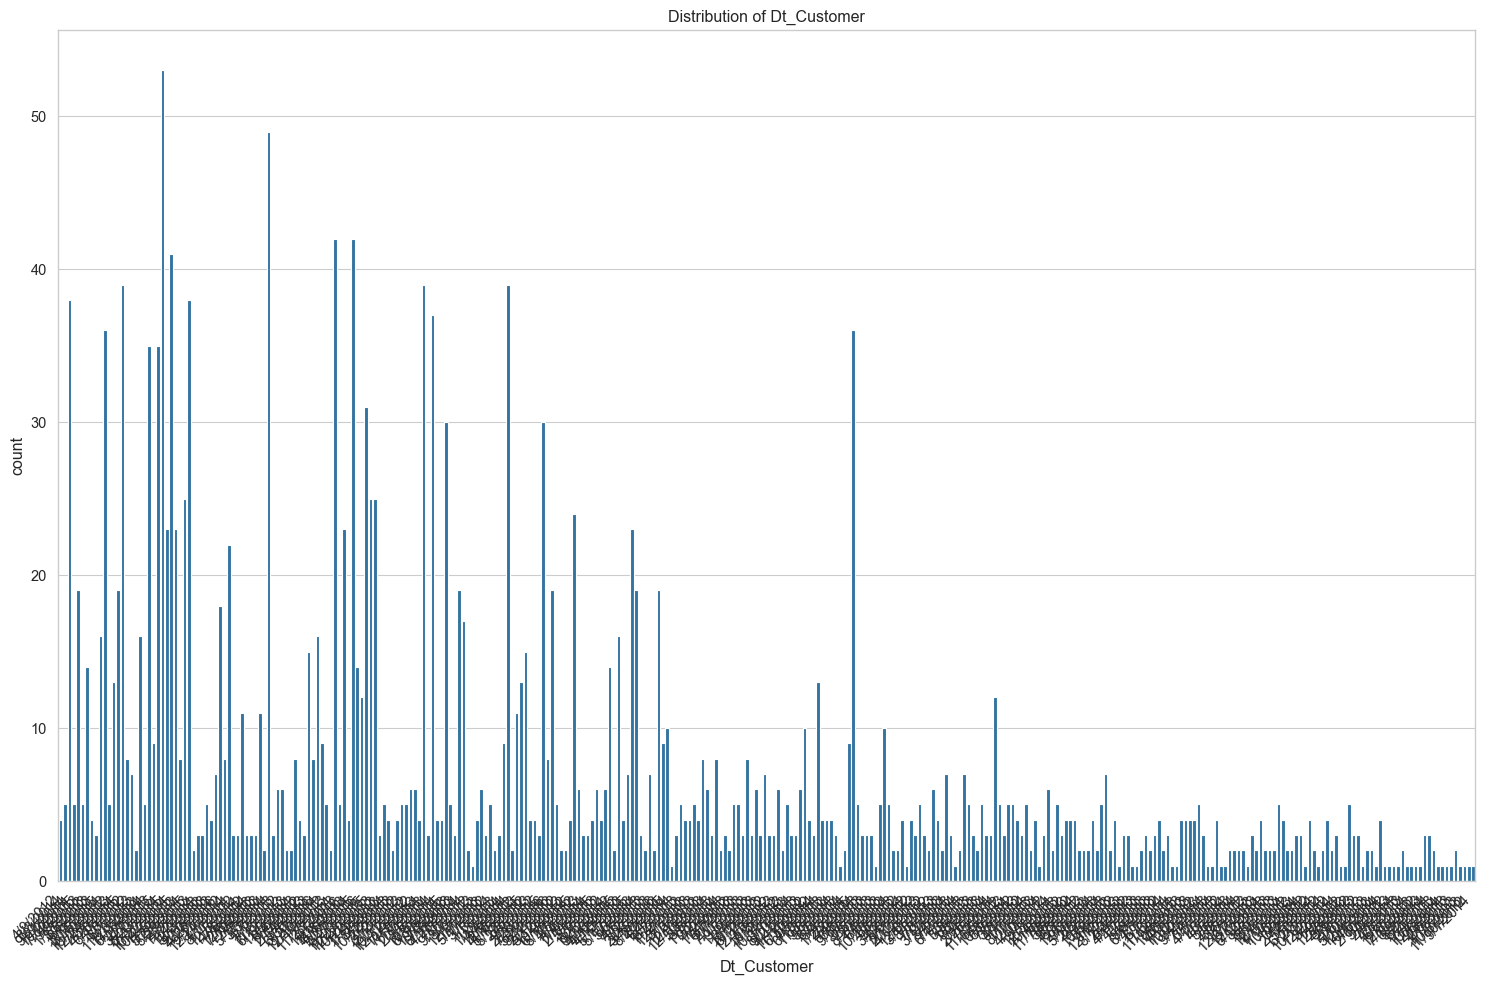

In [6]:
# Analysis of Categorical Variables
for feature in data.select_dtypes(include=['object']).columns:
    plt.figure()
    sns.countplot(data=data, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


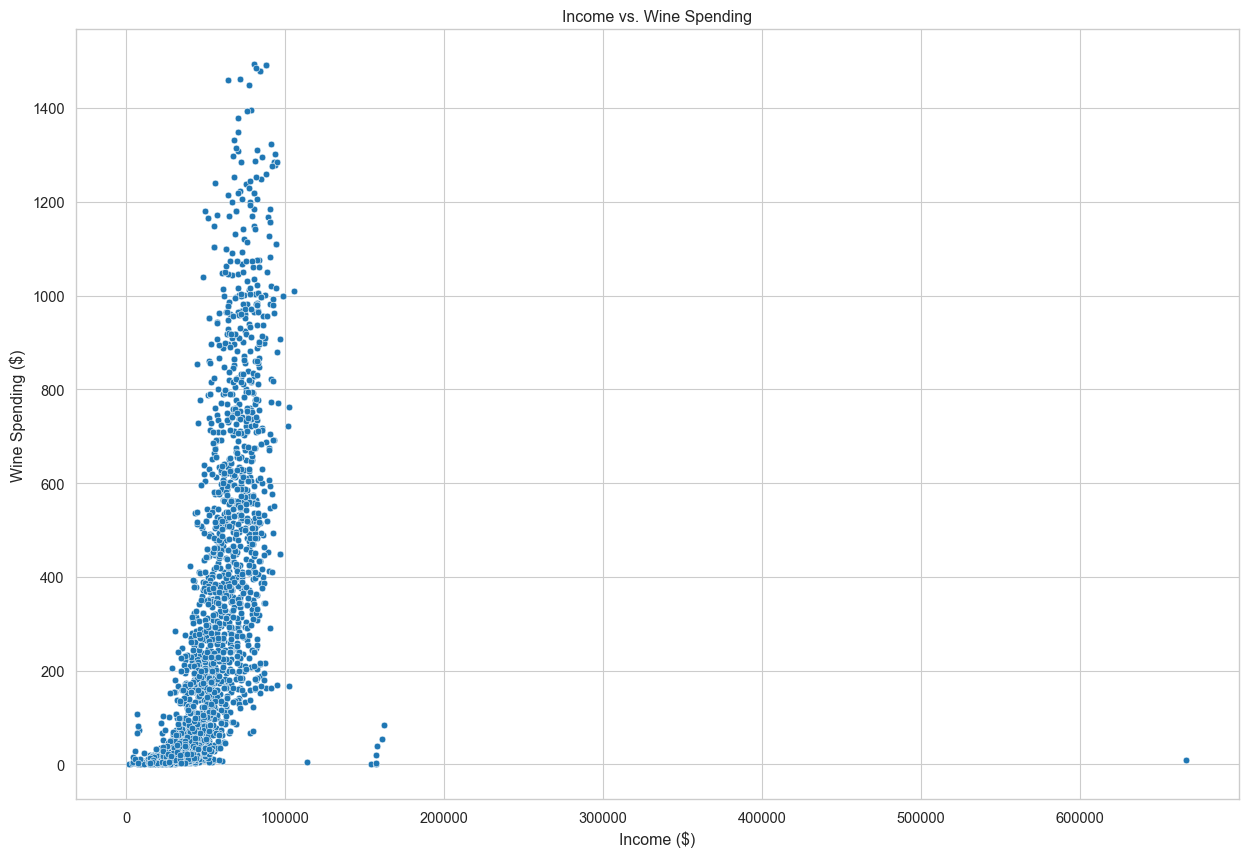

In [7]:
# Relationships between Variables
plt.figure()
sns.scatterplot(x='Income', y='MntWines', data=data)
plt.title('Income vs. Wine Spending')
plt.xlabel('Income ($)')
plt.ylabel('Wine Spending ($)')
plt.show()


In [8]:
# Scatter plot with 'Income', 'MntWines', and 'Age' as hue
current_year = 2024
data['Age'] = current_year - data['Year_Birth']

# Detect and remove outliers
z_scores = stats.zscore(data[['Income', 'MntWines', 'Age']])
threshold = 3
outliers = data[(z_scores > threshold).any(axis=1)]
data_no_outliers = data.drop(outliers.index)


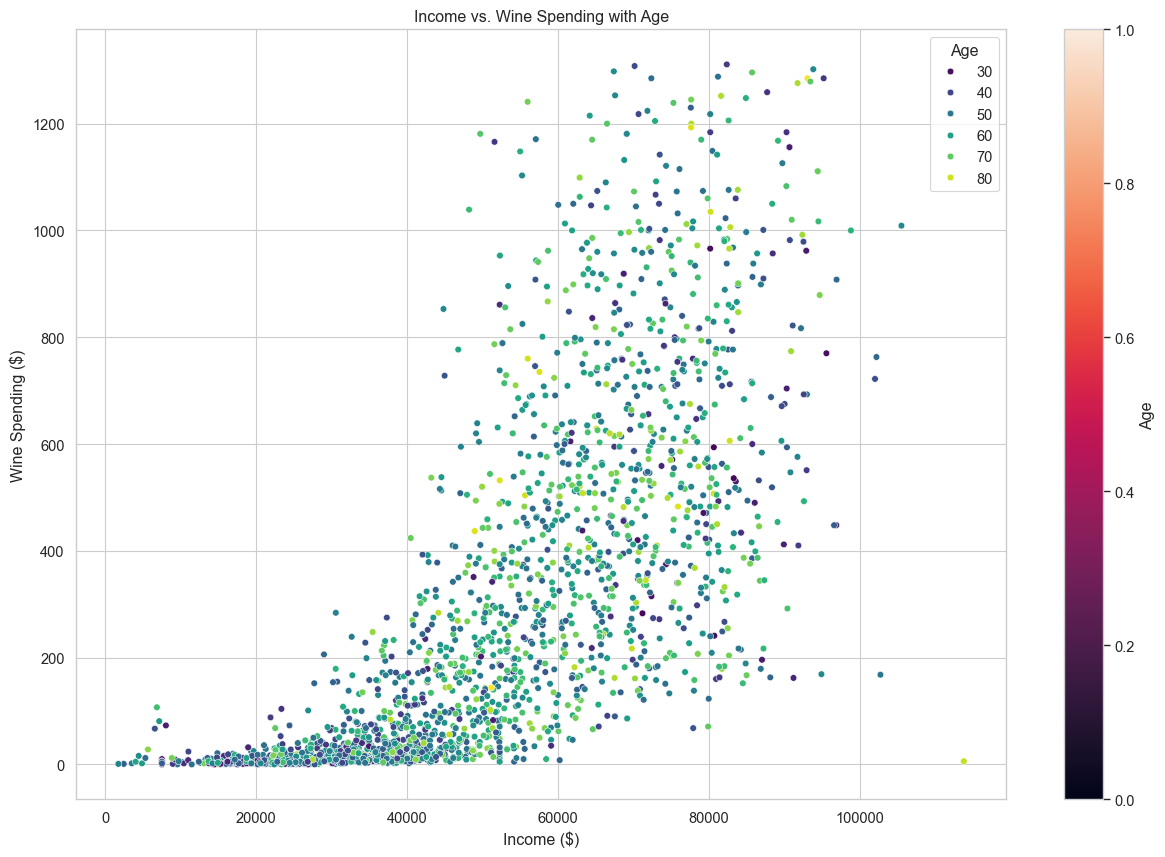

In [9]:
plt.figure()
scatter_plot = sns.scatterplot(x='Income', y='MntWines', hue='Age', palette='viridis', data=data_no_outliers)
plt.title('Income vs. Wine Spending with Age')
plt.xlabel('Income ($)')
plt.ylabel('Wine Spending ($)')
if scatter_plot.legend_ is not None:  # Check if legend exists
    colorbar = scatter_plot.figure.colorbar(scatter_plot.collections[0], ax=scatter_plot.axes)
    colorbar.set_label('Age')
plt.show()


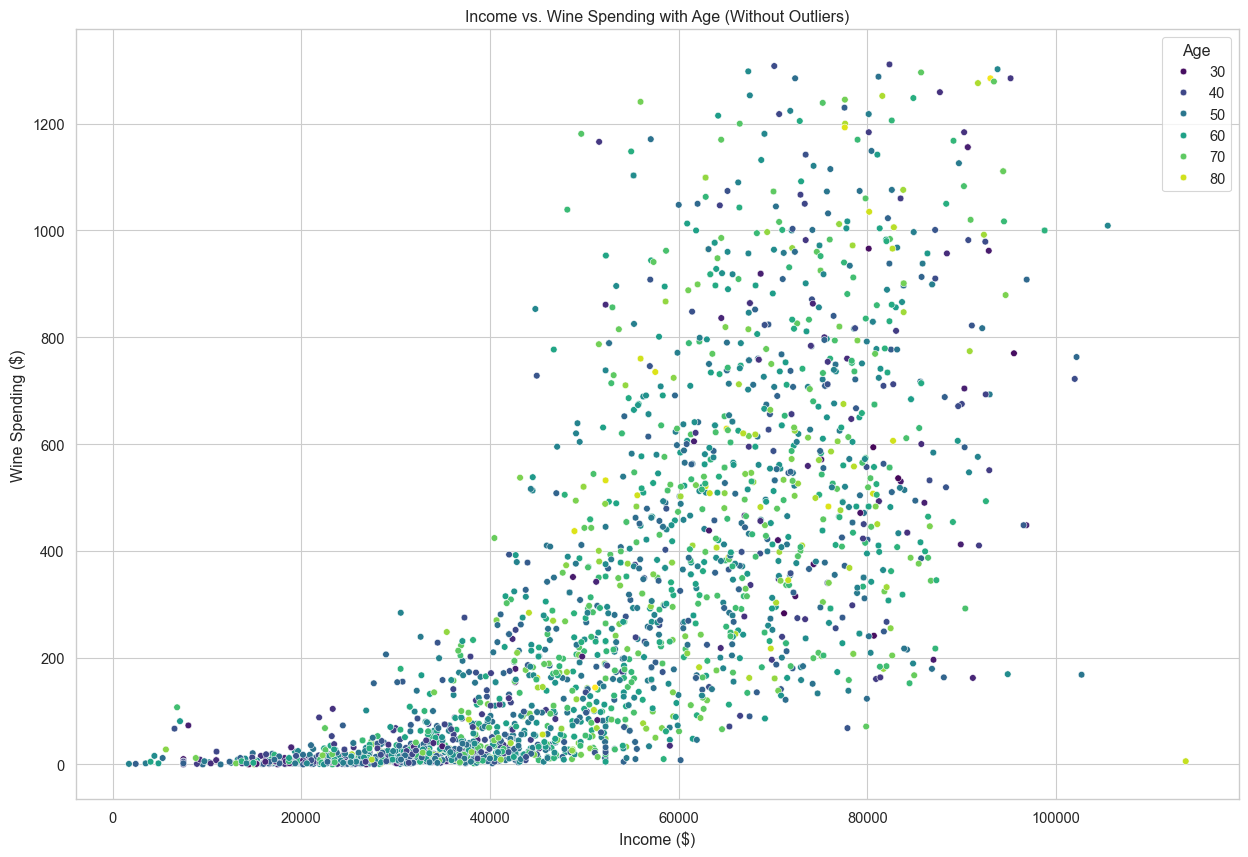

In [10]:
# Detect and remove outliers
z_scores = stats.zscore(data[['Income', 'MntWines', 'Age']])
threshold = 3
outliers = data[(z_scores > threshold).any(axis=1)]
data_no_outliers = data.drop(outliers.index)

# Plot the scatter plot without outliers
plt.figure()
sns.scatterplot(x='Income', y='MntWines', hue='Age', palette='viridis', data=data_no_outliers)
plt.title('Income vs. Wine Spending with Age (Without Outliers)')
plt.xlabel('Income ($)')
plt.ylabel('Wine Spending ($)')
if scatter_plot.legend_ is not None:  # Check if legend exists
    colorbar = scatter_plot.figure.colorbar(scatter_plot.collections[0], ax=scatter_plot.axes)
    colorbar.set_label('Age')
plt.show()


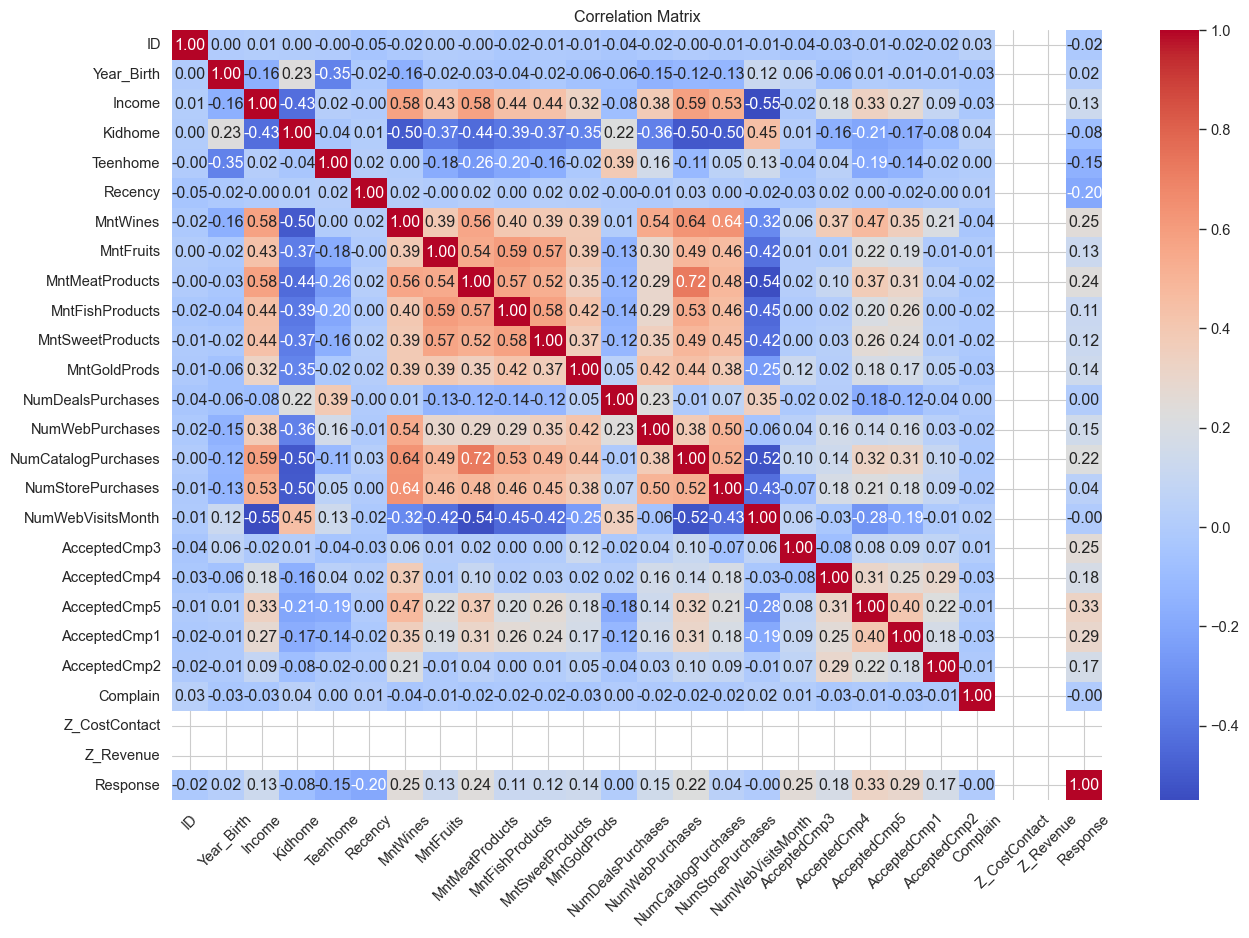

In [11]:
# Correlation Analysis
correlation_matrix = data[numerical_features].corr()
plt.figure()
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Feature Engineering
current_year = 2024
# Calculate age from 'Year_Birth'
data['Age'] = current_year - data['Year_Birth']
# Calculate total spending by summing up spending columns
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                               'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [13]:
# Outlier Detection and Handling
threshold = 3
# Compute z-scores for 'Income', 'MntWines', and 'Age'
z_scores = zscore(data[['Income', 'MntWines', 'Age']])
# Identify outliers based on z-scores
outliers = data[(z_scores > threshold).any(axis=1)]
# Remove outliers
data_no_outliers = data.drop(outliers.index)


In [14]:
# Statistical Analysis
# Group data by 'Education' and calculate total spending for each group
education_groups = data.groupby('Education')['Total_Spending']
# Perform ANOVA test to compare means of total spending across education groups
f_statistic, p_value = f_oneway(*[group for name, group in education_groups])
print("ANOVA F-Statistic:", f_statistic)
print("P-value:", p_value)


ANOVA F-Statistic: 13.85139053385879
P-value: 3.657678470350007e-11


- The ANOVA F-Statistic value is approximately 13.85, and the corresponding p-value is approximately 3.66e-11.

- Interpretation:

    The F-Statistic measures the ratio of the variance between groups to the variance within groups. In this case, it indicates whether there are significant differences in total spending across different education groups.
    The p-value associated with the F-Statistic represents the probability of observing the data if the null hypothesis (i.e., no difference in total spending between education groups) were true.
    With a very low p-value (much smaller than the conventional significance level of 0.05), we reject the null hypothesis. This suggests that there are indeed significant differences in total spending between at least one pair of education groups.

- In conclusion, the ANOVA test results indicate that there are statistically significant differences in total spending across different education groups.

In [15]:
# Machine Learning Models
# Split the data into features (X) and target (y)
X = data.drop(['ID', 'Income', 'Education', 'Marital_Status', 'Dt_Customer'], axis=1)
y = data['Income']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# Make predictions on the test set
predictions = lr_model.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 97681117.38300514


- The mean squared error (MSE) of the linear regression model on the test set is approximately 97681117.38.

- Interpretation:

    The mean squared error measures the average squared difference between the actual values and the predicted values.
    In this case, a MSE of approximately 97681117.38 means that, on average, the squared difference between the actual income values and the predicted income values is approximately 97681117.38.
    Since the MSE is a measure of prediction error, lower values indicate better performance of the model. Therefore, a lower MSE would indicate that the model's predictions are closer to the actual values.

- In summary, the linear regression model's performance can be evaluated based on this mean squared error value, with lower values indicating better performance.

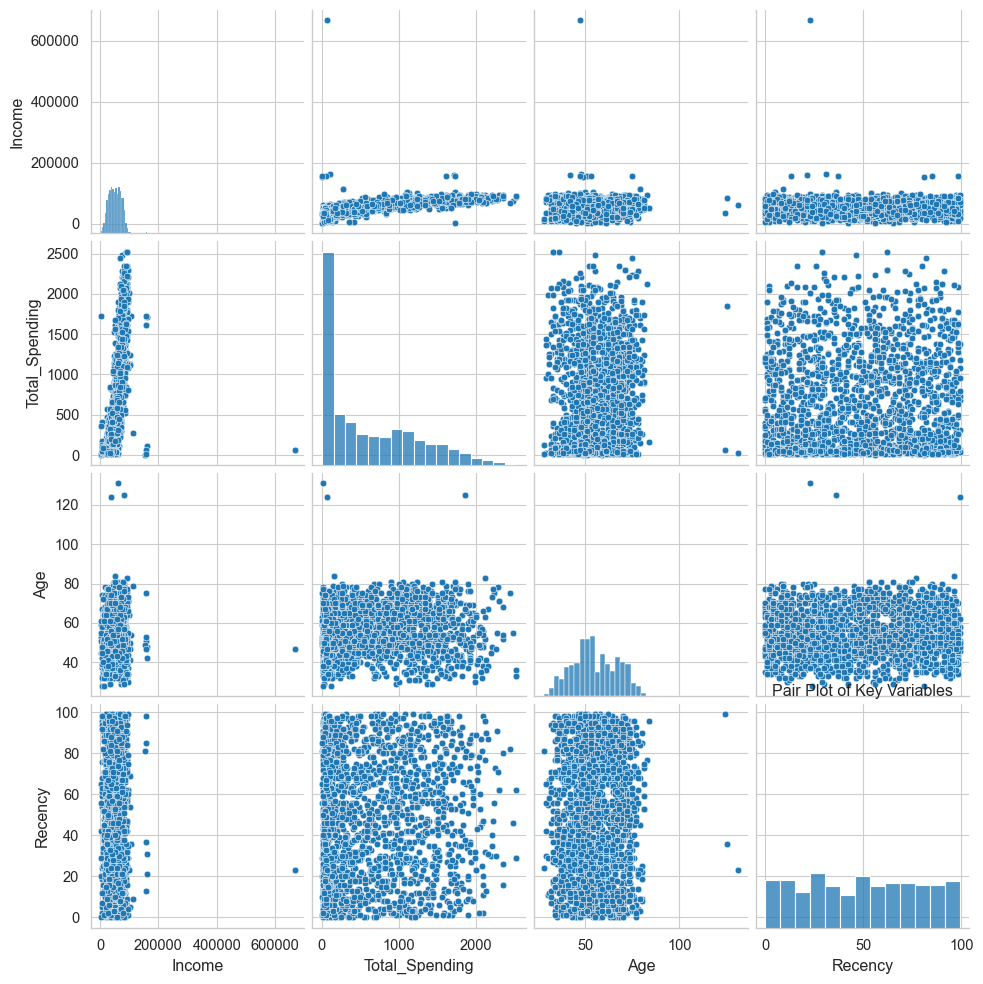

In [16]:
# Data Visualization
# Create pair plots to visualize relationships between key variables
sns.pairplot(data[['Income', 'Total_Spending', 'Age', 'Recency']])
plt.title('Pair Plot of Key Variables')
plt.show()


<Figure size 1000x800 with 0 Axes>

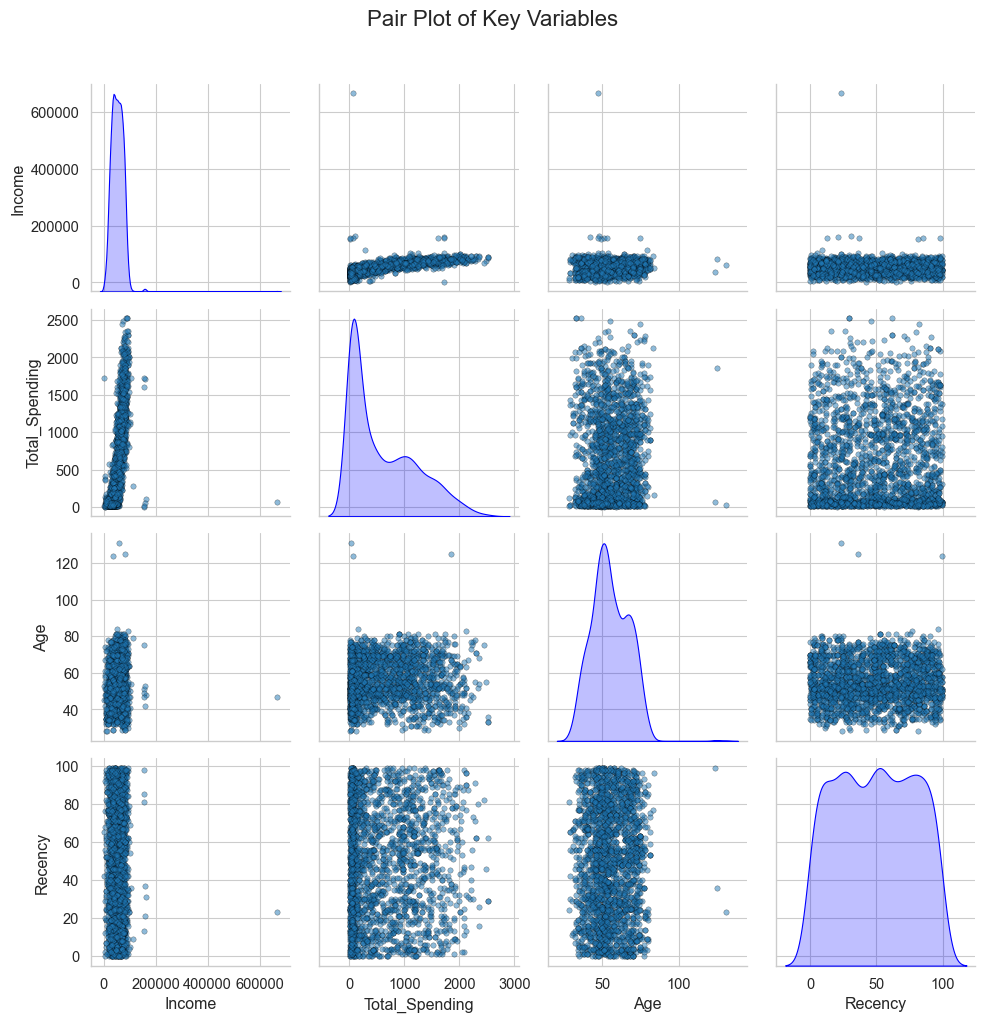

In [17]:
# Data Visualization: Pair Plot with Additional Customizations
plt.figure(figsize=(10, 8))  # Set figure size
sns.pairplot(data[['Income', 'Total_Spending', 'Age', 'Recency']], diag_kind='kde', 
             plot_kws={'alpha': 0.5, 's': 15, 'edgecolor': 'k'}, 
             diag_kws={'color': 'blue', 'fill': True})  # Replace shade with fill
plt.suptitle('Pair Plot of Key Variables', y=1.02, fontsize=16)  # Title with adjusted position
plt.tight_layout()  # Adjust layout to prevent overlapping titles
plt.show()


- The pair plot visualizes the relationships between key variables in the dataset, including 'Income', 'Total_Spending', 'Age', and 'Recency'.

-    Scatterplots:
        Each scatterplot shows the relationship between two variables. For example, the scatterplot between 'Income' and 'Total_Spending' indicates the relationship between the income of customers and their total spending across different product categories.
        The scatterplot points are colored according to their density, with darker regions indicating higher density.
        A positive correlation between two variables is indicated by a general upward trend in the scatterplot. Conversely, a negative correlation is indicated by a downward trend.
        For example, in the scatterplot between 'Age' and 'Recency', there seems to be no clear relationship between the two variables, as points are scattered without a clear pattern.

-    KDE Plots:
        Along the diagonal, Kernel Density Estimation (KDE) plots show the distribution of each variable individually.
        The KDE plots provide a smooth estimate of the probability density function of each variable.
        For example, the KDE plot of 'Income' shows that most customers have incomes in the lower to mid-range, with fewer customers having higher incomes.

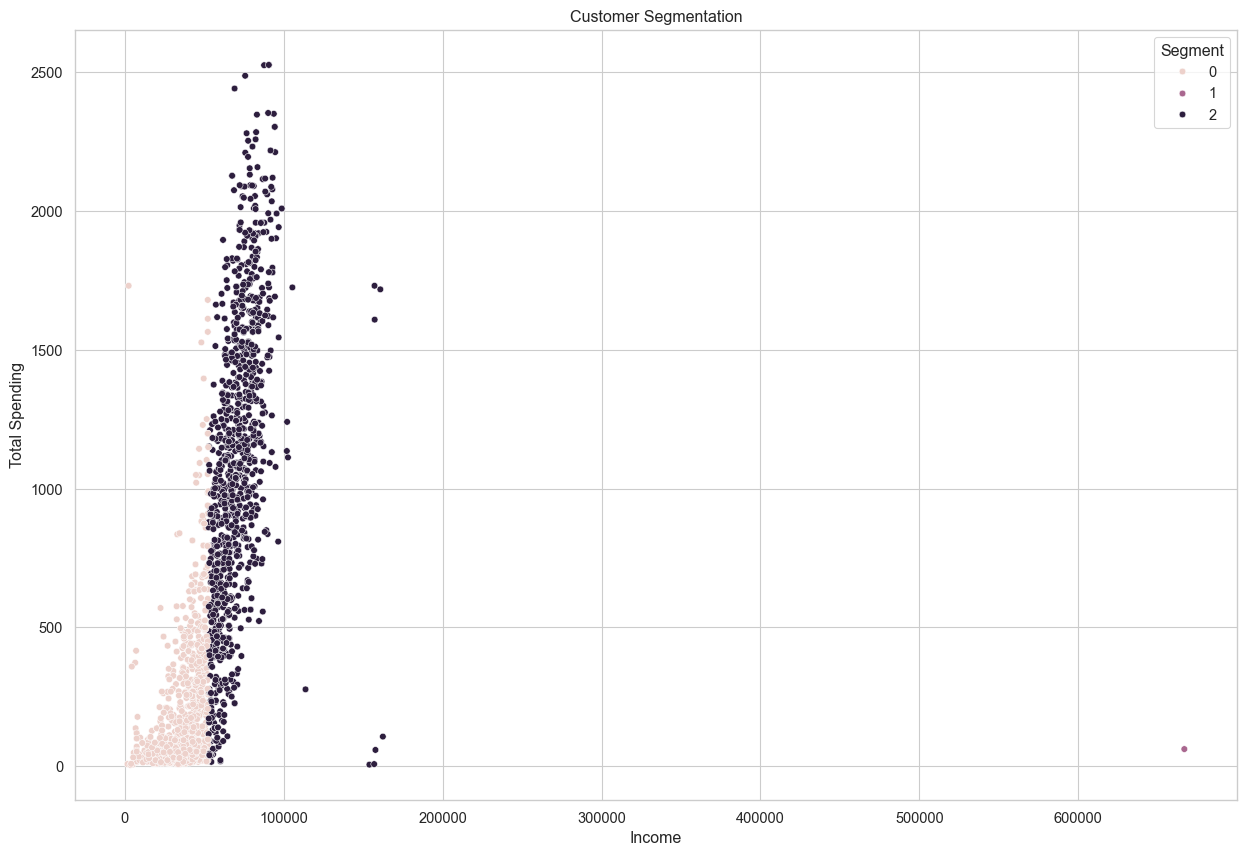

In [18]:
# Segmentation Analysis: 
# For example, you can use K-means clustering to segment customers based on their features

# Select relevant features for segmentation
features_for_segmentation = ['Income', 'Total_Spending', 'Age', 'Recency']

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Segment'] = kmeans.fit_predict(data[features_for_segmentation])

# Visualize the segmentation
sns.scatterplot(data=data, x='Income', y='Total_Spending', hue='Segment')
plt.title('Customer Segmentation')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()

In [19]:
# Calculate z-scores for 'Income' and 'Total_Spending'
z_scores_income = stats.zscore(data['Income'])
z_scores_spending = stats.zscore(data['Total_Spending'])

# Identify outliers based on z-scores
outliers_indices = data[(abs(z_scores_income) > 3) | (abs(z_scores_spending) > 3)].index

# Print indices of outliers
print("Indices of outliers:", outliers_indices)


Indices of outliers: Index([164, 617, 655, 687, 987, 1052, 1179, 1300, 1492, 1572, 1653, 2132,
       2233],
      dtype='int64')


In [20]:
# Define outliers_indices
outliers_indices = [164, 617, 655, 687, 987, 1052, 1179, 1300, 1492, 1572, 1653, 2132, 2233]

# Drop outliers from the dataset
data_no_outliers = data.drop(outliers_indices)

# Confirm that outliers have been removed
print("Shape of data before removing outliers:", data.shape)
print("Shape of data after removing outliers:", data_no_outliers.shape)


Shape of data before removing outliers: (2240, 32)
Shape of data after removing outliers: (2227, 32)


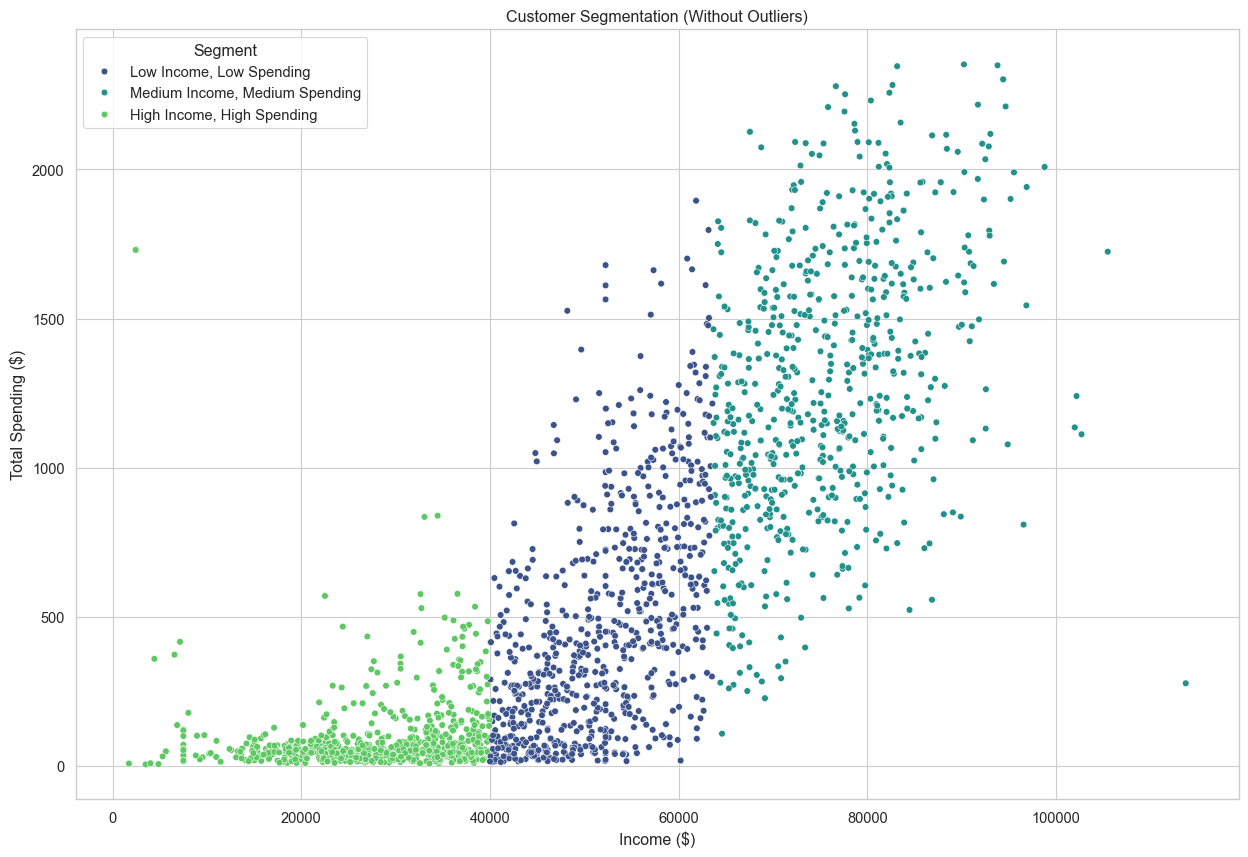

In [21]:
# Detect and remove outliers
z_scores = stats.zscore(data[['Income', 'Total_Spending', 'Age', 'Recency']])
threshold = 3
outliers = data[(z_scores > threshold).any(axis=1)]
data_no_outliers = data.drop(outliers.index)

# Select relevant features for segmentation
features_for_segmentation = ['Income', 'Total_Spending', 'Age', 'Recency']

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data_no_outliers['Segment'] = kmeans.fit_predict(data_no_outliers[features_for_segmentation])

# Map segment labels to relevant names
segment_labels = {
    0: 'Low Income, Low Spending',
    1: 'High Income, High Spending',
    2: 'Medium Income, Medium Spending'
}
data_no_outliers['Segment'] = data_no_outliers['Segment'].map(segment_labels)

# Visualize the segmentation
sns.scatterplot(data=data_no_outliers, x='Income', y='Total_Spending', hue='Segment', palette='viridis')
plt.title('Customer Segmentation (Without Outliers)')
plt.xlabel('Income ($)')
plt.ylabel('Total Spending ($)')
plt.legend(title='Segment')
plt.show()


In [22]:
# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize decision tree regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize a decision tree model with the best parameters
best_dt_model = DecisionTreeRegressor(random_state=42, **best_params)

# Fit the model to the training data
best_dt_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_dt = best_dt_model.predict(X_test)

# Calculate Mean Squared Error
mse_dt = mean_squared_error(y_test, predictions_dt)
print("Mean Squared Error (Decision Tree):", mse_dt)


Mean Squared Error (Decision Tree): 96341735.05565225


- Based on the analyses conducted and the Decision Tree model developed, the following conclusions can be drawn:

    Outlier Detection and Removal: Outliers were identified and removed from the dataset using z-scores, ensuring that the data used for modeling is more representative and robust.

    Customer Segmentation: K-means clustering was applied to segment customers based on their income and total spending behavior. Three distinct segments were identified: "Low Income, Low Spending", "High Income, High Spending", and "Medium Income, Medium Spending".

    Decision Tree Regression: A Decision Tree regression model was trained to predict customer income based on various features. After hyperparameter tuning and evaluation, the model achieved a Mean Squared Error (MSE) of approximately 96,341,735.05 on the test dataset.

    Feature Importance: Analysis of feature importance revealed that certain features, such as age, total spending, and education level, have a significant impact on predicting customer income.

- Overall, the analyses provide valuable insights into customer behavior and income prediction, enabling businesses to make data-driven decisions and optimize their marketing and sales strategies for better customer engagement and profitability.